In [2]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get a list of all CSV files in the current working directory
csv_files = glob.glob('cs159_csvs/*.csv')

# Create a dictionary to store the dataframes
dataframes = {}

# Loop through the list of CSV files and read each one into a dataframe
for file in csv_files:
    # Use the file name (without .csv) as the key for the dictionary
    df_name = os.path.splitext(os.path.basename(file))[0]
    print(df_name)
    dataframes[df_name] = pd.read_csv(file)



verifier_results_toxicity
agentic_results_toxicity
verifier_results_empathy
single_agent_results
verifier_results_status
roles_results_status
roles_results_empathy
agentic_results_status
debated_results_empathy
sampled_data
roles_results_toxicity
agentic_results_empathy
debated_results_status
debated_results_toxicity


In [3]:
def plot_scores(f1_scores, kappa_scores, weighted_kappa_scores, task_name=""):
    """
    Generates bar charts for F1, Kappa, and Weighted Kappa scores.

    Args:
        f1_scores (dict): Dictionary of F1 scores.
        kappa_scores (dict): Dictionary of Cohen's Kappa scores.
        weighted_kappa_scores (dict): Dictionary of Weighted Cohen's Kappa scores.
        task_name (str): Optional name of the task (e.g., "Empathy", "Toxicity") for the plot title.
    """
    labels = list(f1_scores.keys())
    f1_values = list(f1_scores.values())
    kappa_values = list(kappa_scores.values())
    weighted_kappa_values = list(weighted_kappa_scores.values())

    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars

    # Define pastel colors for bars
    pastel_blue = "#91BCCC"
    pastel_green = "#80B19B"
    pastel_purple = "#9C86C2"
    
    # Define a darker color for text elements
    text_color = '#333333' # A dark grey

    fig, ax = plt.subplots(figsize=(12, 7))
    rects1 = ax.bar(x - width, f1_values, width, label='F1 Score', color=pastel_blue)
    rects2 = ax.bar(x, kappa_values, width, label="Cohen's Kappa", color=pastel_green)
    rects3 = ax.bar(x + width, weighted_kappa_values, width, label="Weighted Kappa", color=pastel_purple)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores', fontsize=14, fontweight='bold', color=text_color)
    plot_title = f'Model Performance Metrics'
    if task_name:
        plot_title += f' for {task_name} Task'
    ax.set_title(plot_title, fontsize=16, fontweight='bold', color=text_color)
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=12, fontweight='bold', color=text_color)
    
    ax.legend(fontsize=11)

    ax.bar_label(rects1, padding=3, fmt='%.2f', fontsize=10)
    ax.bar_label(rects2, padding=3, fmt='%.2f', fontsize=10)
    ax.bar_label(rects3, padding=3, fmt='%.2f', fontsize=10)

    fig.tight_layout()
    plt.ylim(0, 1.1) # Assuming scores are between 0 and 1, adjust if necessary
    plt.grid(axis='y', linestyle='--')
    plt.show()

In [4]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import cohen_kappa_score, f1_score

In [5]:
def calculate_f1_score(df, agent_labels, actual_labels, print_name):
    ai_answers = df[agent_labels]
    levels = df[actual_labels]
    f1 = f1_score(levels, ai_answers, average='macro')
    print(f"F1 Score ({print_name}): {f1:.2f}")
    return f1

def calculate_cohens_kappa(df, agent_labels, actual_labels, print_name):
    ratings1 = df[agent_labels]
    ratings2 = df[actual_labels]
    normal_kappa = cohen_kappa_score(ratings1, ratings2)
    weighted_kappa = cohen_kappa_score(ratings1, ratings2, weights='quadratic')
    print(f"Cohen's Kappa ({print_name}): {normal_kappa:.2f}\nWeighted Cohen's Kappa ({print_name}): {weighted_kappa:.2f}")
    return normal_kappa, weighted_kappa

In [6]:
# Empathy Task
empathy_dfs = {}
empathy_dfs['Agentic Roles'] = dataframes['agentic_results_empathy']
empathy_dfs['Verifier'] = dataframes['verifier_results_empathy']
empathy_dfs['Roles'] = dataframes['roles_results_empathy']
empathy_dfs['Debated'] = dataframes['debated_results_empathy']

# print column names for each dataframe
# make new df that holds all level and initial_ai_level_num columns from all the data frames
dfs_to_concat = []
for source_df_name, df in empathy_dfs.items():
    temp_df = df[['level', 'initial_ai_level_num']].copy()
    dfs_to_concat.append(temp_df)

single_agent_df = pd.concat(dfs_to_concat, ignore_index=True)


In [7]:
f1_scores = {}
kappa_scores = {}
weighted_kappa_scores = {}
print("Metrics for Single Agent Response (Empathy):")
f1_scores['Single Agent'] = calculate_f1_score(single_agent_df,'initial_ai_level_num', 'level', 'Single AgentLevel')
kappa_scores['Single Agent'], weighted_kappa_scores['Single Agent'] = calculate_cohens_kappa(single_agent_df,'initial_ai_level_num', 'level', 'Single AgentLevel')

for key, df in empathy_dfs.items():
  agent_labels = df.columns.tolist()[8]
  print(f"\nMetrics for {key} Response (Empathy):")
  f1_scores[key] = calculate_f1_score(df, agent_labels, 'level', key)
  kappa_scores[key], weighted_kappa_scores[key] = calculate_cohens_kappa(df, agent_labels, 'level', key)

Metrics for Single Agent Response (Empathy):
F1 Score (Single AgentLevel): 0.65
Cohen's Kappa (Single AgentLevel): 0.63
Weighted Cohen's Kappa (Single AgentLevel): 0.75

Metrics for Agentic Roles Response (Empathy):
F1 Score (Agentic Roles): 0.73
Cohen's Kappa (Agentic Roles): 0.70
Weighted Cohen's Kappa (Agentic Roles): 0.83

Metrics for Verifier Response (Empathy):
F1 Score (Verifier): 0.58
Cohen's Kappa (Verifier): 0.52
Weighted Cohen's Kappa (Verifier): 0.65

Metrics for Roles Response (Empathy):
F1 Score (Roles): 0.70
Cohen's Kappa (Roles): 0.70
Weighted Cohen's Kappa (Roles): 0.80

Metrics for Debated Response (Empathy):
F1 Score (Debated): 0.54
Cohen's Kappa (Debated): 0.53
Weighted Cohen's Kappa (Debated): 0.65


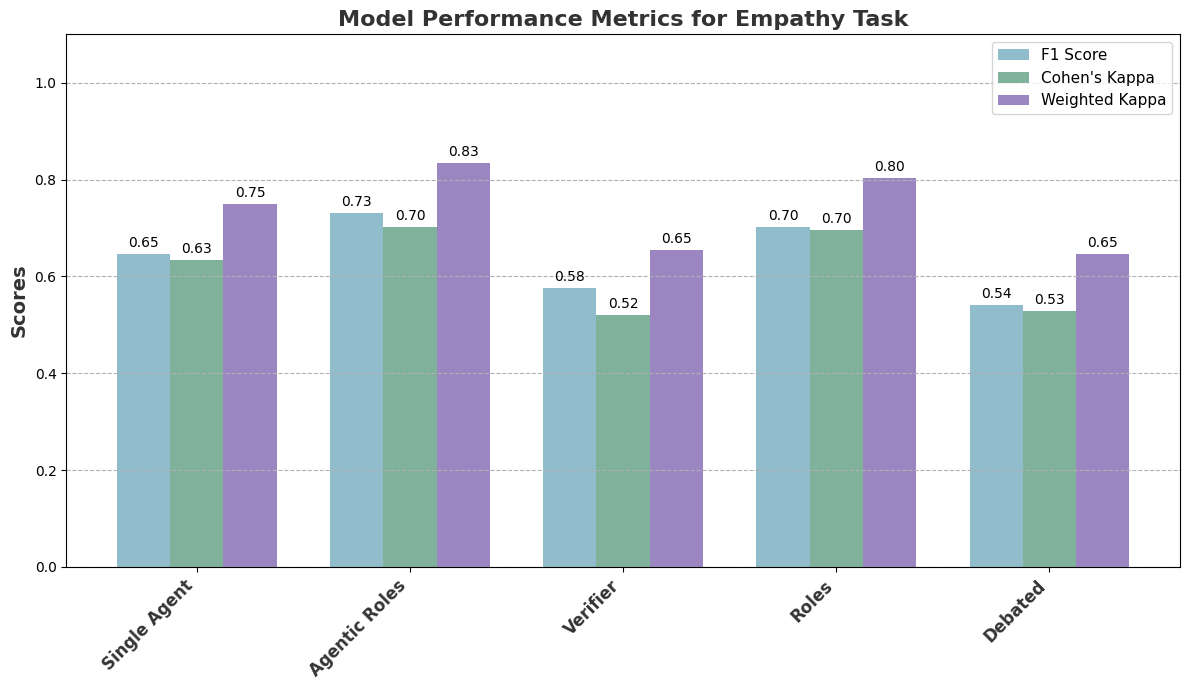

In [8]:
plot_scores(f1_scores, kappa_scores, weighted_kappa_scores, task_name="Empathy")

In [9]:
# Toxicity Task
toxicity_dfs = {}
toxicity_dfs['Agentic Roles'] = dataframes['agentic_results_toxicity']
toxicity_dfs['Verifier'] = dataframes['verifier_results_toxicity']
toxicity_dfs['Roles'] = dataframes['roles_results_toxicity']
toxicity_dfs['Debated'] = dataframes['debated_results_toxicity']

# print column names for each dataframe
# make new df that holds all level and initial_ai_level_num columns from all the data frames
dfs_to_concat = []
for source_df_name, df in toxicity_dfs.items():
    temp_df = df[['label', 'initial_ai_label']].copy()
    dfs_to_concat.append(temp_df)

single_agent_df = pd.concat(dfs_to_concat, ignore_index=True)
print(f"Single Agent columns: {single_agent_df.columns.tolist()}")

for key, df in toxicity_dfs.items():
    print(f"{key} columns: {df.columns.tolist()}")

Single Agent columns: ['label', 'initial_ai_label']
Agentic Roles columns: ['conversation_id', 'text_pair', 'label', 'initial_ai_label', 'final_ai_label', 'final_ai_rationale', 'role_individual_responses_json', 'roles_used']
Verifier columns: ['conversation_id', 'text_pair', 'label', 'initial_ai_label', 'debated_ai_label', 'debated_ai_rationale', 'verifier_justification', 'verifier_agreed', 'verifier_suggested_label']
Roles columns: ['conversation_id', 'text_pair', 'label', 'initial_ai_label', 'debated_ai_label', 'debated_ai_rationale', 'panel_justification', 'panel_agreement', 'panel_suggested_label']
Debated columns: ['conversation_id', 'text_pair', 'label', 'initial_ai_label', 'debated_ai_label', 'debated_ai_rationale', 'pro_view_argument', 'anti_view_argument', 'anti_view_suggested_label']


In [10]:
f1_scores = {}
kappa_scores = {}
weighted_kappa_scores = {}

print("Metrics for Single Agent Response (Toxicity):")
f1_scores['Single Agent'] = calculate_f1_score(single_agent_df,'initial_ai_label', 'label', 'Single AgentLevel')
kappa_scores['Single Agent'], weighted_kappa_scores['Single Agent'] = calculate_cohens_kappa(single_agent_df,'initial_ai_label', 'label', 'Single AgentLevel')

for key, df in toxicity_dfs.items():
  agent_labels = df.columns.tolist()[4]
  print(f"\nMetrics for {key} Response (Toxicity):")
  f1_scores[key] = calculate_f1_score(df, agent_labels, 'label', key)
  kappa_scores[key], weighted_kappa_scores[key] = calculate_cohens_kappa(df, agent_labels, 'label', key)

Metrics for Single Agent Response (Toxicity):
F1 Score (Single AgentLevel): 0.60
Cohen's Kappa (Single AgentLevel): 0.23
Weighted Cohen's Kappa (Single AgentLevel): 0.23

Metrics for Agentic Roles Response (Toxicity):
F1 Score (Agentic Roles): 0.65
Cohen's Kappa (Agentic Roles): 0.30
Weighted Cohen's Kappa (Agentic Roles): 0.30

Metrics for Verifier Response (Toxicity):
F1 Score (Verifier): 0.55
Cohen's Kappa (Verifier): 0.15
Weighted Cohen's Kappa (Verifier): 0.15

Metrics for Roles Response (Toxicity):
F1 Score (Roles): 0.61
Cohen's Kappa (Roles): 0.23
Weighted Cohen's Kappa (Roles): 0.23

Metrics for Debated Response (Toxicity):
F1 Score (Debated): 0.53
Cohen's Kappa (Debated): 0.08
Weighted Cohen's Kappa (Debated): 0.08


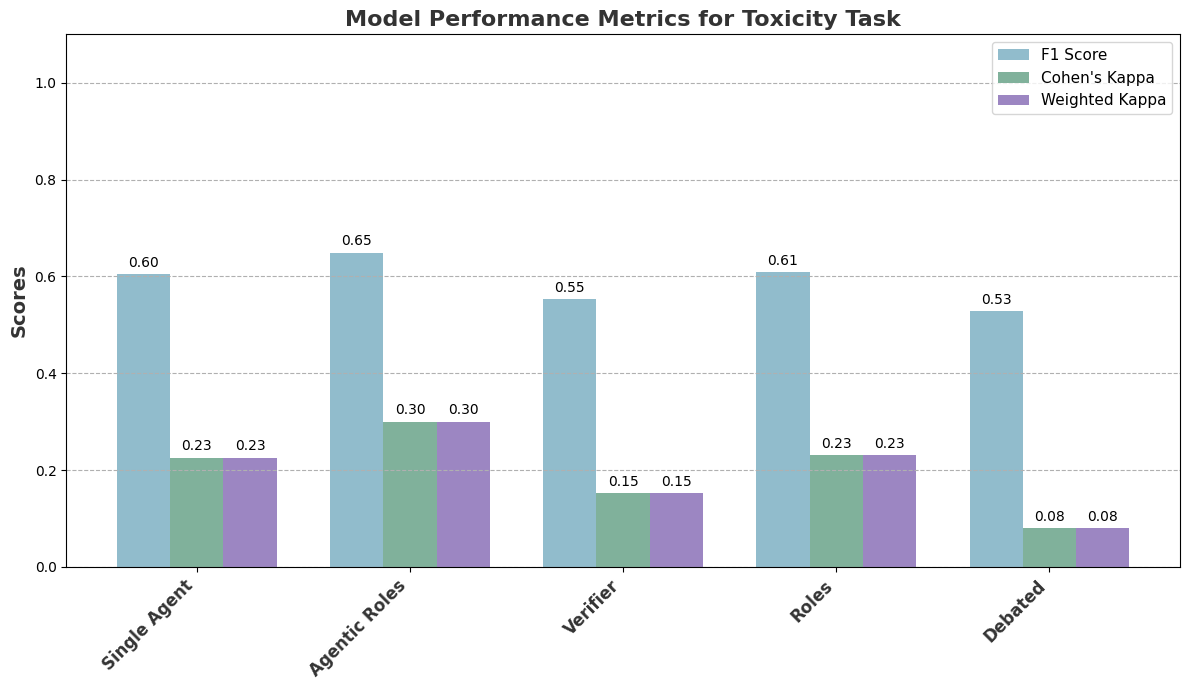

In [11]:
plot_scores(f1_scores, kappa_scores, weighted_kappa_scores, task_name="Toxicity")

In [17]:
# Status Task
status_dfs = {}
agentic_df = dataframes['agentic_results_status']
status_dfs['Single Agent'] = dataframes['single_agent_results']
status_dfs['Verifier'] = dataframes['verifier_results_status']
print(status_dfs['Verifier'])
status_dfs['Roles'] = dataframes['roles_results_status']
status_dfs['Debated'] = dataframes['debated_results_status']

sampled_df = dataframes['sampled_data']


         speaker_id  is_admin  \
0            Doh286     False   
1            Egyegy     False   
2          Arsenikk     False   
3    {unknown-5016}     False   
4    {unknown-5860}     False   
..              ...       ...   
995  69.115.115.236     False   
996      SusanLesch     False   
997          Elenaf     False   
998           Hinto     False   
999        Deetdeet     False   

                                          history_text  
0    [Doh286]: He was drafted by New Jersey in the ...  
1    [Egyegy]: Since you were the blocking admin of...  
2    [Arsenikk]: Thanks for adding the map coordina...  
3    [{unknown-5016}]: {{od|::::::::::::::}}I'm not...  
4    [{unknown-5860}]: I'll userfy the page for you...  
..                                                 ...  
995  [69.115.115.236]: thanck you for helping me wi...  
996  [SusanLesch]: [[User:Mhym|Mhym]] created the a...  
997  [Elenaf]: Hello, sorry for disturbing but you ...  
998  [Hinto]: Sure, go right ahea

In [13]:
def calculate_f1_score(df, print_name, num=1000, key='is_admin'):
    ai_answers = df[key]
    levels = sampled_df['is_admin'].head(num)
    f1 = f1_score(levels, ai_answers, average='macro')
    print(f"F1 Score ({print_name}): {f1:.2f}")
    return f1

def calculate_cohens_kappa(df, print_name, num=1000, key='is_admin'):
    ratings1 = df[key]
    ratings2 = sampled_df['is_admin'].head(num)
    normal_kappa = cohen_kappa_score(ratings1, ratings2)
    weighted_kappa = cohen_kappa_score(ratings1, ratings2, weights='quadratic')
    print(f"Cohen's Kappa ({print_name}): {normal_kappa:.2f}\nWeighted Cohen's Kappa ({print_name}): {weighted_kappa:.2f}")
    return normal_kappa, weighted_kappa

In [20]:
f1_scores = {}
kappa_scores = {}
weighted_kappa_scores = {}
i = 0 
for key, df in status_dfs.items():
  print(key)
  i +=1
  if i == 2:
    print("\nMetrics for Agentic Roles Response (Power + Status):")
    f1_scores['Agentic Roles'] = calculate_f1_score(agentic_df,'Agentic Roles', len(agentic_df), 'debated_ai_label_num')
    kappa_scores['Agentic Roles'], weighted_kappa_scores['Agentic Roles'] = calculate_cohens_kappa(agentic_df,'Agentic Roles', len(agentic_df), 'debated_ai_label_num')

  print(f"\nMetrics for {key} Response (Power + Status):")
  f1_scores[key] = calculate_f1_score(df, key, len(df))
  kappa_scores[key], weighted_kappa_scores[key] = calculate_cohens_kappa(df, key, len(df))

  


Single Agent

Metrics for Single Agent Response (Power + Status):
F1 Score (Single Agent): 0.71
Cohen's Kappa (Single Agent): 0.42
Weighted Cohen's Kappa (Single Agent): 0.42
Verifier

Metrics for Agentic Roles Response (Power + Status):
F1 Score (Agentic Roles): 0.84
Cohen's Kappa (Agentic Roles): 0.68
Weighted Cohen's Kappa (Agentic Roles): 0.68

Metrics for Verifier Response (Power + Status):
F1 Score (Verifier): 0.77
Cohen's Kappa (Verifier): 0.53
Weighted Cohen's Kappa (Verifier): 0.53
Roles

Metrics for Roles Response (Power + Status):
F1 Score (Roles): 0.48
Cohen's Kappa (Roles): 0.00
Weighted Cohen's Kappa (Roles): 0.00
Debated

Metrics for Debated Response (Power + Status):
F1 Score (Debated): 0.43
Cohen's Kappa (Debated): -0.12
Weighted Cohen's Kappa (Debated): -0.12


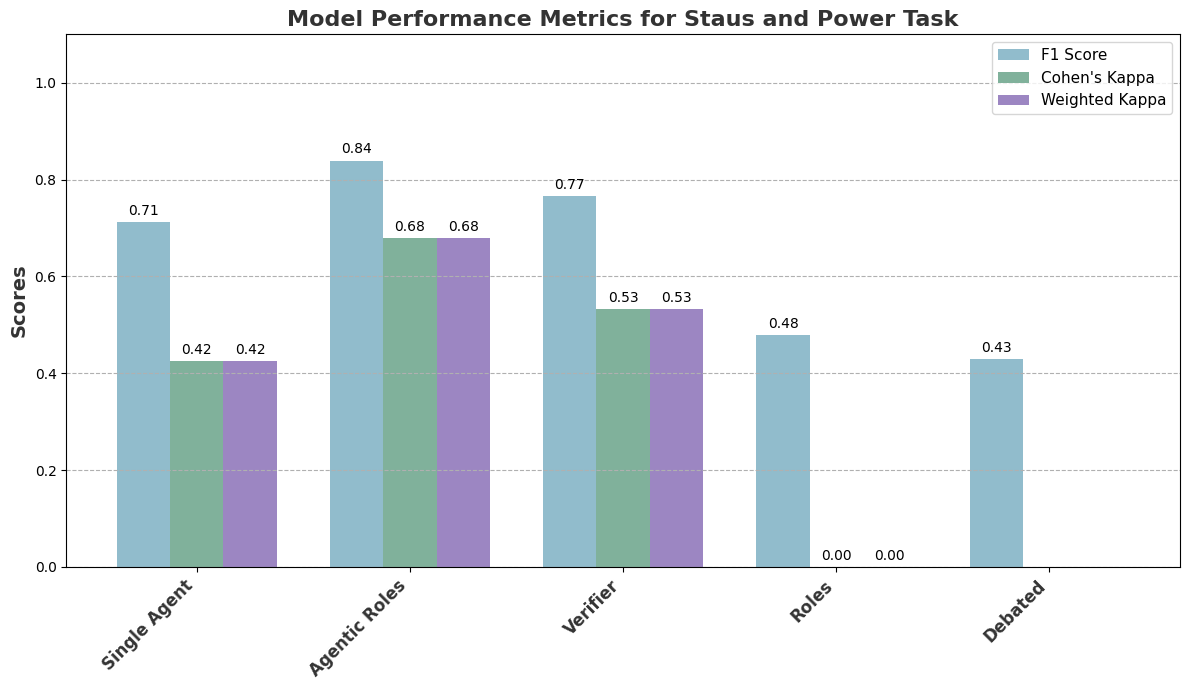

In [21]:
plot_scores(f1_scores, kappa_scores, weighted_kappa_scores, task_name="Staus and Power")